Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [81]:
# cell for imports. All imports must go here.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [3]:
titanic_df = pd.read_csv('train.csv')

In [10]:
titanic_df.info()
titanic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

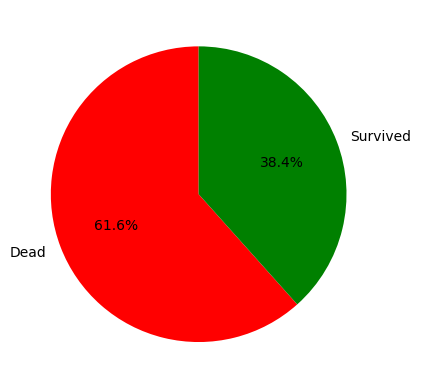

In [37]:
survived_count = titanic_df['Survived'].value_counts()
plt.pie(survived_count, labels=['Dead', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.show()

Pie Chart - показує, що 38.4 % пасажирві вижило (виділено зеленим кольором), та 61.6 % пасажирів загинуло (виділено червоним кольором).

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


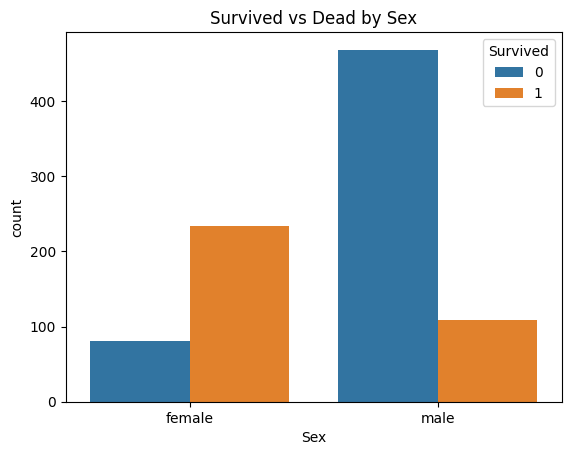

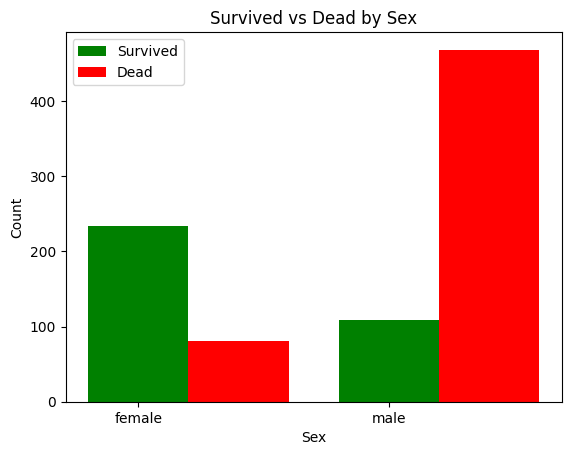

In [71]:
survived_by_sex = titanic_df.groupby('Sex', as_index=False)['Survived'].sum()
total_by_sex = titanic_df.groupby('Sex', as_index=False)['Survived'].count()

dead_by_sex = total_by_sex['Survived'] - survived_by_sex['Survived']

plt.bar(survived_by_sex['Sex'], survived_by_sex['Survived'], width=0.4, color='green', label='Survived')
plt.bar(dead_by_sex.index + 0.4, dead_by_sex, width=0.4, color='red', label='Dead')
plt.xlabel('Sex')
plt.ylabel('Сount')
plt.title("Survived vs Dead by Sex")
plt.legend()

plt.show()

Виживших жінок більш ніж вдвічі більше чим загиблих. Загиблих чоловіків приблизно в 4 рази більше ніж виживжших. Також можна побачити, що виживших жінок приблизно вдвічі більше ніж виживших чоловіків.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

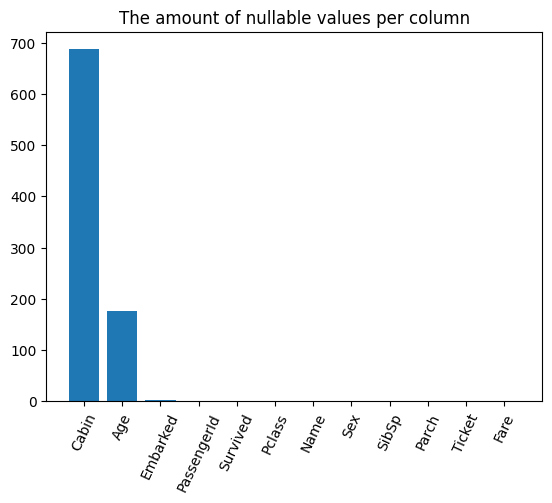

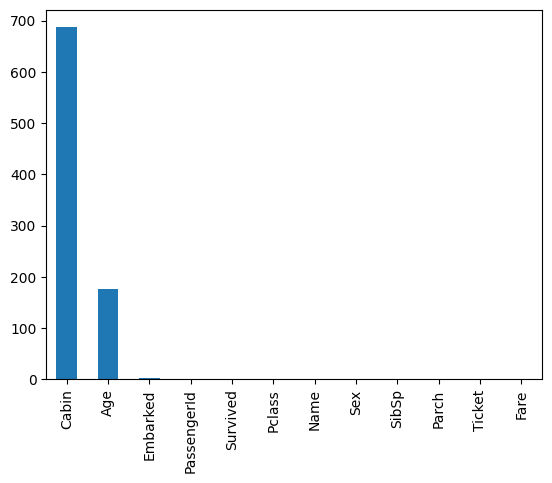

In [77]:
missing_values_count = titanic_df.isnull().sum()
missing_values_count_sorted = missing_values_count.sort_values(ascending=False)
missing_values_count_sorted.plot(kind='bar')

plt.show()

Для більшості пасажирів відсутні дані про каюту. Приблизно для 200 пасажрів немає даних про вік. Також є декілька пасажриів для яких немає даних про порт посадки (embarking). Всі інші значення не пусті.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

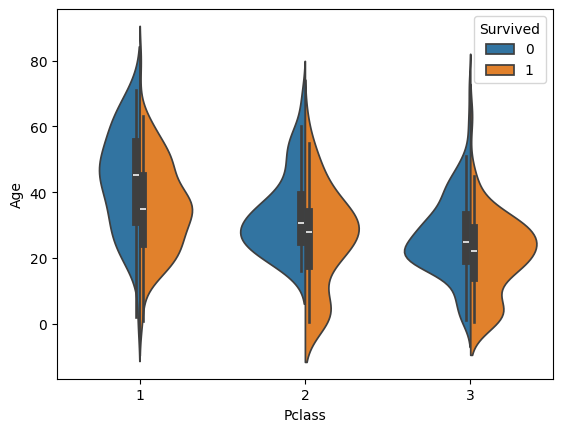

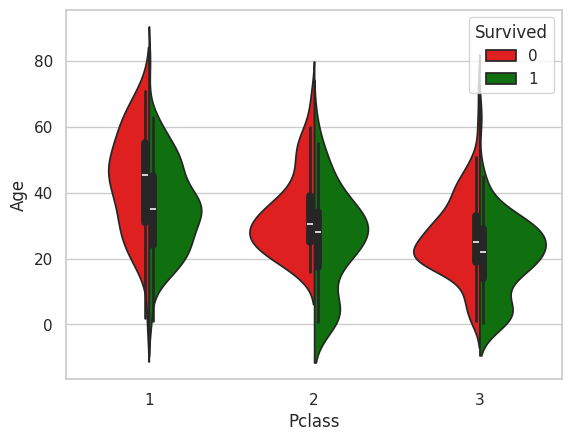

In [89]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic_df, split=True, palette={0: "red", 1: "green"})
plt.show()

Даний графік називається скрипкова діаграма (violin plot). В даному випадку На ньому показано залежність між віком пасажирів та їхньою долею(вижили чи загинули) у різних класах. Кожна "частина" графіку представляє розподіл вижвших(зелений колір) та загилблих(червоний колір) у одному з 3-х класів.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


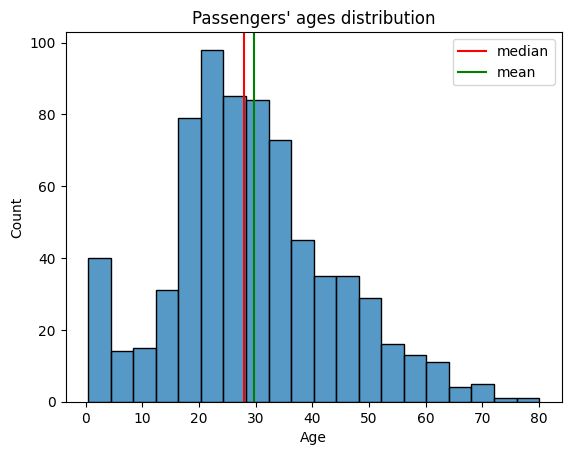

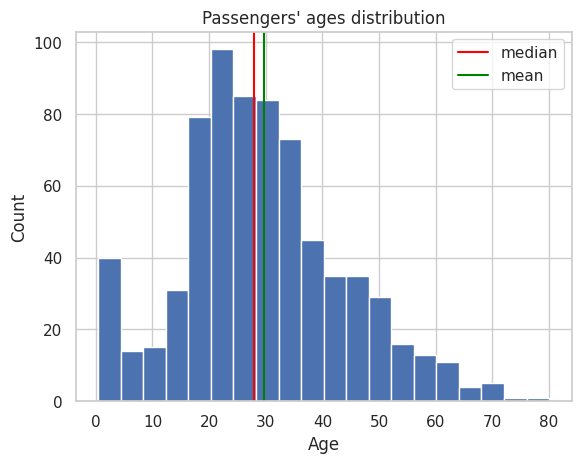

In [109]:
mean_age = titanic_df['Age'].mean()
median_age = titanic_df['Age'].median()

plt.hist(titanic_df['Age'].dropna(), bins=20)
plt.axvline(median_age, color='red', label='median')
plt.axvline(mean_age, color='green', label='mean')
plt.title("Passengers' ages distribution")
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

Середній вік пасажирів - трохи менше 30 років, медіана - ще трошки менше середнього віку. Загалоб вік більшості пасажирів від 20 до 40 років. Не було пасажирів старше за 80 років. Також доволі багато (відносно інших дітей) дітей до 3-4 років.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Як змінюється шанс виживання пасажирів в різних класах на кораблі?

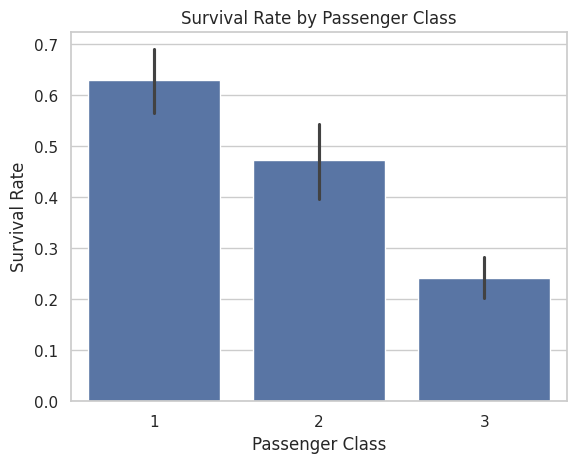

In [113]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

plt.show()

Найбільши відсоток виживших в першому класі, далі другий, в третьому класі відсоток виживших найменший. Пасажири вищих класів мали більші шанси вижити.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

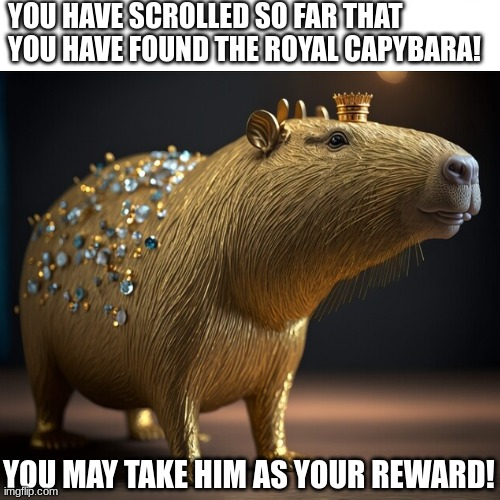